In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [22]:
def getSymbolReport(symbol:str) -> str:
    """
    Get required financial report for the desired symbol.
    symbol: Symbol
    """
    ticker = yf.Ticker(symbol)
    info_dict = ticker.get_info()
    news_list = ticker.get_news()
    institutional_holders = ticker.get_institutional_holders()
    mutualfund_holders = ticker.get_mutualfund_holders()   
    ann_income_stmt = ticker.get_income_stmt()
    qua_income_stmt = ticker.quarterly_income_stmt
    ann_balance_sheet = ticker.get_balance_sheet()
    qua_balance_sheet = ticker.quarterly_balance_sheet

    def getCompanyInfo(info_dict:dict) -> str: 

        sel_fields = ['longName','website','sector','industry','longBusinessSummary','fullTimeEmployees','companyOfficers']
        s = f"## **{info_dict['longName']}**<br>\n"
        for field in sel_fields:
            if field in info_dict.keys():
                if field == 'longBusinessSummary':
                    s += f"\n### **Business Summary**<br>\n{info_dict[field]}"
                    continue
                elif field == 'fullTimeEmployees':
                    s += "\n### **Employee Details**<br>\n"
                elif field == 'companyOfficers':
                    s += 'majorEmployees:<br>\n'
                    for officer in info_dict['companyOfficers']:
                        s += f"- {officer['name']}: {officer['title']}<br>\n"
                    continue
                s += f"{field}: " + str(info_dict[field]) + "<br>\n"
        return s
    
    def getCompanyNews(news_list:list) -> str:

        sel_fields = ['title','link','publisher']
        s = f"### **Recent Company News**<br>\n"
        for news in news_list:
            for field in sel_fields:
                s += f"{field}: " + f"{news[field]}<br>\n"
            s += "<br>\n"
        return s
    
    def getInvestorData(df1:pd.DataFrame, df2:pd.DataFrame) -> str:

        # Institutional Holders and Percentage Holding
        plt.figure(figsize=(15,5))
        plt.title('Institutional Holders and Percentage Holding')
        plt.pie(df1['Shares'],normalize=True,labels=df1['Holder'])
        plt.pie(df1['Shares'],normalize=True,labels=round((df1['Shares']/df1['Shares'].sum())*100,3),labeldistance=0.5,rotatelabels=True)
        plt.savefig('./ReportMedia/Institutional_Holders_and_Percentage_Holding.png')
        
        # Mutual_Fund_Holders_and_Percentage_Holding
        plt.figure(figsize=(15,5))
        plt.title('Mutual Fund Holders and Percentage Holding')
        plt.pie(df2['Shares'],normalize=True,labels=df2['Holder'])
        plt.pie(df2['Shares'],normalize=True,labels=round((df2['Shares']/df2['Shares'].sum())*100,3),labeldistance=0.5,rotatelabels=True)
        plt.savefig('./ReportMedia/Mutual_Fund_Holders_and_Percentage_Holding.png')

        s = "### **Investor Data**<br>\n![Institutional Holders and Percentage Holding](./ReportMedia/Institutional_Holders_and_Percentage_Holding.png)<br>\n![Mutual_Fund_Holders_and_Percentage_Holding](./ReportMedia/Mutual_Fund_Holders_and_Percentage_Holding.png)<br>\n"
        return s
    
    def plot_current_ratio(df1:dict, df4:pd.DataFrame, df5:pd.DataFrame, ann:bool, qua:bool):
        
        columns1 = [str(column)[:10] for column in df4.columns]
        columns2 = [str(column)[:10] for column in df5.columns]
        
        # ax2 = ax1.twinx()
        # ax1.plot(x, y1, 'g-')
        # ax2.plot(x, y2, 'b-')

        # ax1.set_xlabel('X data')
        # ax1.set_ylabel('Y1 data', color='g')
        # ax2.set_ylabel('Y2 data', color='b')
        s = ''

        if ann and qua:
            fig,ax = plt.subplots(1,2, figsize=(15,8))
            fig.suptitle('Current Ratio')
            ax0t = ax[0].twiny()
            coords = np.arange(len(columns1))
            coords1 = coords + 0.125
            coords2 = coords - 0.125
            scaling_factor = 2/max(np.max([np.array(df4.loc['CurrentAssets']), np.array(df4.loc['CurrentLiabilities'])], axis = 0))
            ax0t.barh(coords1, np.array(df4.loc['CurrentAssets'])*scaling_factor,0.25 , color = 'g', alpha = 0.4)
            ax0t.barh(coords2, np.array(df4.loc['CurrentLiabilities'])*scaling_factor,0.25 , color = 'r', alpha = 0.4)
            ax0t.set_xlabel(f'Downscaled Current Assets and Liablities, Scaling Factor: {scaling_factor:.3e}')

            ax[0].set_title('Annual Current Ratio')
            ax[0].plot(np.array(df4.loc['CurrentAssets'])/np.array(df4.loc['CurrentLiabilities']), columns1)
            ax[0].set_ylabel('Time Instance')
            ax[0].set_xlabel('Current Ratio')
            ax[0].grid(alpha = 0.5)

            ax1t = ax[1].twiny()
            coords = np.arange(len(columns2))
            coords1 = coords + 0.125
            coords2 = coords - 0.125
            scaling_factor = 2/max(np.max([np.array(df5.loc['Current Assets']), np.array(df5.loc['Current Liabilities'])], axis = 0))
            ax1t.barh(coords1, np.array(df5.loc['Current Assets'])*scaling_factor,0.25 , color = 'g', alpha = 0.4)
            ax1t.barh(coords2, np.array(df5.loc['Current Liabilities'])*scaling_factor,0.25 , color = 'r', alpha = 0.4)
            ax1t.set_xlabel(f'Downscaled Current Assets and Liablities, Scaling Factor: {scaling_factor:.3e}')

        
            ax[1].set_title('Quarterly Current Ratio')
            ax[1].plot( np.array(df5.loc['Current Assets'])/np.array(df5.loc['Current Liabilities']), columns2)
            ax[1].set_xlabel('Current Ratio')
            ax[1].grid(alpha = 0.5)
            plt.savefig('./ReportMedia/Current_Ratio.png')

            s = "![Current Ratio](./ReportMedia/Current_Ratio.png)<br>\n"
        elif ann:
            fig = plt.figure()
            plt.title('Annual Current Ratio')
            plt.plot(np.array(df4.loc['CurrentAssets'])/np.array(df4.loc['CurrentLiabilities']), columns1)
            plt.ylabel('Time Instance')
            plt.xlabel('Current Ratio')
            plt.grid()
            s = "![Current Ratio](./ReportMedia/Current_Ratio.png)<br>\n"
        elif qua:
            fig = plt.figure()
            plt.title('Quarterly Current Ratio')
            plt.plot(np.array(df5.loc['CurrentAssets'])/np.array(df5.loc['CurrentLiabilities']), columns2)
            plt.ylabel('Time Instance')
            plt.xlabel('Current Ratio')
            plt.grid()
            s = "![Current Ratio](./ReportMedia/Current_Ratio.png)<br>\n"
        else:
            s = f'Historical Data Unavailable. Recent Current Ratio: {df1['currentRatio']}<br>\n'
        return s
    
    def plot_quick_ratio(df:pd.DataFrame):
        pass


    def getFinancials(df1:dict, df2:pd.DataFrame, df3:pd.DataFrame, df4:pd.DataFrame, df5:pd.DataFrame):
        sel_fields1 = ['totalRevenue','totalDebt','totalCash','enterpriseValue','bookValue','marketCap','currentRatio','quickRatio'] # 'debtToEquity','dividendRate','dividendYield','fiveYearAvgDividendYield','earningsGrowth','earningsQuarterlyGrowth','enterpriseToEbitda','enterpriseToRevenue','payoutRatio','priceToBook','profitMargins','returnOnAssets','returnOnEquity','revenueGrowth','revenuePerShare','totalCashPerShare']
        sel_fields2 = ['EBITDA','EBIT','InterestExpense','InterestIncome','TotalExpenses','NetIncome','TotalRevenue','GrossProfit','BasicEPS','ResearchAndDevelopment']
        s = '### **Latest Financials**<br>\n#### General Financials<br>\n'
        for field in sel_fields1:
            if field == 'currentRatio':
                s += '#### Liquidity Ratios<br>\n'
                ann_current_ratio = 0
                qua_current_ratio = 0
                if 'CurrentAssets' in df4.index and 'CurrentLiabilities' in df4.index:
                    ann_current_ratio = 1                    
                if 'Current Assets' in df5.index and 'Current Liabilities' in df5.index:
                    qua_current_ratio = 1
                
                s += plot_current_ratio(df1, df4, df5, ann_current_ratio, qua_current_ratio)
            
            elif field == 'quickRatio':
                fields = ['CurrentAssets', 'CurrentLiabilities','Inventory','PrepaidAssets','OtherCurrentAssets']
                fields1 = ['Current Assets', 'Current Liabilities','Inventory','Prepaid Assets','Other Current Assets']
                ann_quick_ratio = []
                qua_quick_ratio = []
                for index,i in enumerate(fields):
                    if i in df4.index:
                        ann_quick_ratio.append(index)
                for index,i in enumerate(fields1):
                    if i in df5.index:
                        qua_quick_ratio.append(index)
                
                if len(ann_quick_ratio) == 5  and len(qua_quick_ratio) == 5:
                    fig,ax = plt.subplots(1,2,sharey=True, figsize=(10,5))
                    fig.suptitle('Quick Ratio')
                    ax[0].set_xticklabels(rotation=45, labels=df4.columns[:10])
                    ax[0].set_title('Annual Quick Ratio')
                    ax[0].plot(df4.columns, (np.array(df4.loc['CurrentAssets']) - np.array(df4.loc['Inventory']) - np.array(df4.loc['PrepaidAssets']) - np.array(df4.loc['OtherCurrentAssets']))/np.array(df4.loc['CurrentLiabilities']))
                    ax[0].set_xlabel('Time Instance')
                    ax[0].set_ylabel('Quick Ratio')

                    ax[1].set_xticklabels(rotation=45, labels=df5.columns[:10])
                    ax[1].set_title('Quarterly Quick Ratio')
                    ax[1].plot(df5.columns, (np.array(df5.loc['Current Assets']) - np.array(df5.loc['Inventory']) - np.array(df5.loc['Prepaid Assets']) - np.array(df5.loc['Other Current Assets']))/np.array(df5.loc['Current Liabilities']))
                    ax[1].set_xlabel('Time Instance')
                    ax[1].set_ylabel('Quick Ratio')
                    plt.savefig('./ReportMedia/Quick_Ratio.png')
                    s += "![Quick Ratio](./ReportMedia/Quick_Ratio.png)<br>\n"

                elif ([i in ann_quick_ratio for i in [0,1,2,4]] == 4*[True]) and ([i in qua_quick_ratio for i in [0,1,2,4]] == 4*[True]):
                    fig,ax = plt.subplots(1,2,sharey=True, figsize=(10,5))
                    fig.suptitle('Quick Ratio')
                    ax[0].set_xticklabels(rotation=45, labels=df4.columns[:10])
                    ax[0].set_title('Annual Quick Ratio')
                    ax[0].plot(df4.columns, (np.array(df4.loc['CurrentAssets']) - np.array(df4.loc['Inventory']) - np.array(df4.loc['OtherCurrentAssets']))/np.array(df4.loc['CurrentLiabilities']))
                    ax[0].set_xlabel('Time Instance')
                    ax[0].set_ylabel('Quick Ratio')
                    
                    ax[1].set_xticklabels(rotation=45, labels=df5.columns[:10])
                    ax[1].set_title('Quarterly Quick Ratio')
                    ax[1].plot(df5.columns, (np.array(df5.loc['Current Assets']) - np.array(df5.loc['Inventory']) - np.array(df5.loc['Other Current Assets']))/np.array(df5.loc['Current Liabilities']))
                    ax[1].set_xlabel('Time Instance')
                    ax[1].set_ylabel('Quick Ratio')
                    plt.savefig('./ReportMedia/Quick_Ratio.png')
                    s += "![Quick Ratio](./ReportMedia/Quick_Ratio.png)<br>\n"
                
                elif ([i in ann_quick_ratio for i in [0,1,3,4]] == 4*[True]) and ([i in qua_quick_ratio for i in [0,1,3,4]] == 4*[True]):
                    fig,ax = plt.subplots(1,2,sharey=True, figsize=(10,5))
                    fig.suptitle('Quick Ratio')
                    ax[0].set_xticklabels(rotation=45, labels=df4.columns[:10])
                    ax[0].set_title('Annual Quick Ratio')
                    ax[0].plot(df4.columns, (np.array(df4.loc['CurrentAssets']) - np.array(df4.loc['PrepaidAssets']) - np.array(df4.loc['OtherCurrentAssets']))/np.array(df4.loc['CurrentLiabilities']))
                    ax[0].set_xlabel('Time Instance')
                    ax[0].set_ylabel('Quick Ratio')

                    ax[1].set_xticklabels(rotation=45, labels=df5.columns[:10])
                    ax[1].set_title('Quarterly Quick Ratio')
                    ax[1].plot(df5.columns, (np.array(df5.loc['Current Assets']) - np.array(df5.loc['Prepaid Assets']) - np.array(df5.loc['Other Current Assets']))/np.array(df5.loc['Current Liabilities']))
                    ax[1].set_xlabel('Time Instance')
                    ax[1].set_ylabel('Quick Ratio')
                    plt.savefig('./ReportMedia/Quick_Ratio.png')
                    s += "![Quick Ratio](./ReportMedia/Quick_Ratio.png)<br>\n"

                elif ([i in ann_quick_ratio for i in [0,1,4]] == 4*[True]) and ([i in qua_quick_ratio for i in [0,1,4]] == 4*[True]):
                    fig,ax = plt.subplots(1,2,sharey=True, figsize=(10,5))
                    fig.suptitle('Quick Ratio')
                    ax[0].set_xticklabels(rotation=45, labels=df4.columns[:10])
                    ax[0].set_title('Annual Quick Ratio')
                    ax[0].plot(df4.columns, (np.array(df4.loc['CurrentAssets']) - np.array(df4.loc['OtherCurrentAssets']))/np.array(df4.loc['CurrentLiabilities']))
                    ax[0].set_xlabel('Time Instance')
                    ax[0].set_ylabel('Quick Ratio')

                    ax[1].set_xticklabels(rotation=45, labels=df5.columns[:10])
                    ax[1].set_title('Quarterly Quick Ratio')
                    ax[1].plot(df5.columns, (np.array(df5.loc['Current Assets']) - np.array(df5.loc['Other Current Assets']))/np.array(df5.loc['Current Liabilities']))
                    ax[1].set_xlabel('Time Instance')
                    ax[1].set_ylabel('Quick Ratio')
                    plt.savefig('./ReportMedia/Quick_Ratio.png')
                    s += "![Quick Ratio](./ReportMedia/Quick_Ratio.png)<br>\n"
                
                else:
                    s += f'Historical Data Unavailable. Recent Quick Ratio: {df1['quickRatio']}<br>\n'
            elif field == 'bookValue':
                s += f"{field}PerShare: " + f"{df1[field]}<br>\n"
            elif field == 'enterpriseValue':
                s += f"{field}: " + f"{df1[field] if df1[field] > 0 else df1['marketCap'] + df1['totalDebt'] - df5.loc['Cash And Cash Equivalents'].iloc[0]}<br>\n"
            else:
                s += f"{field}: " + f"{df1[field]}<br>\n"
        return s

    return getCompanyInfo(info_dict = info_dict) + getCompanyNews(news_list = news_list) + getInvestorData(df1 = institutional_holders, df2 = mutualfund_holders) + getFinancials(df1 = info_dict, df2 = ann_income_stmt, df3 = qua_income_stmt, df4 = ann_balance_sheet, df5 = qua_balance_sheet)

C:\Users\Hrriday\AppData\Local\Temp\ipykernel_3324\3033461566.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(rotation=45, labels=df4.columns[:10])
C:\Users\Hrriday\AppData\Local\Temp\ipykernel_3324\3033461566.py:191: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(rotation=45, labels=df5.columns[:10])


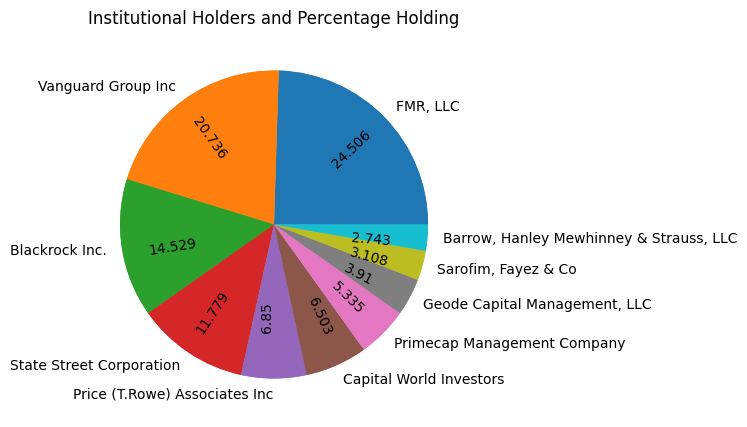

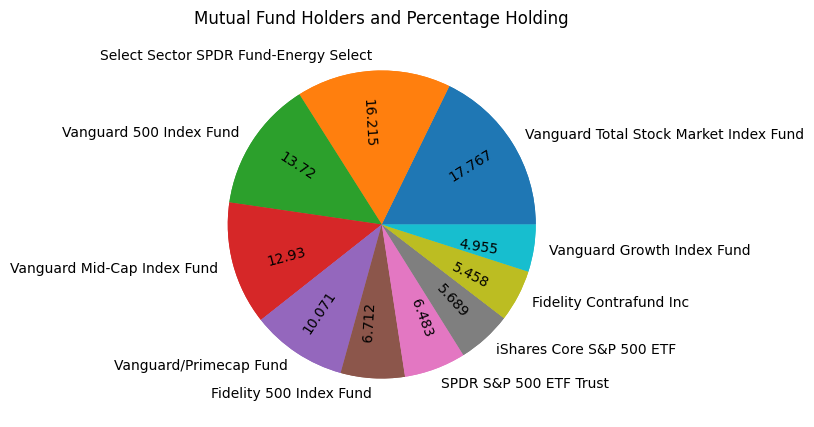

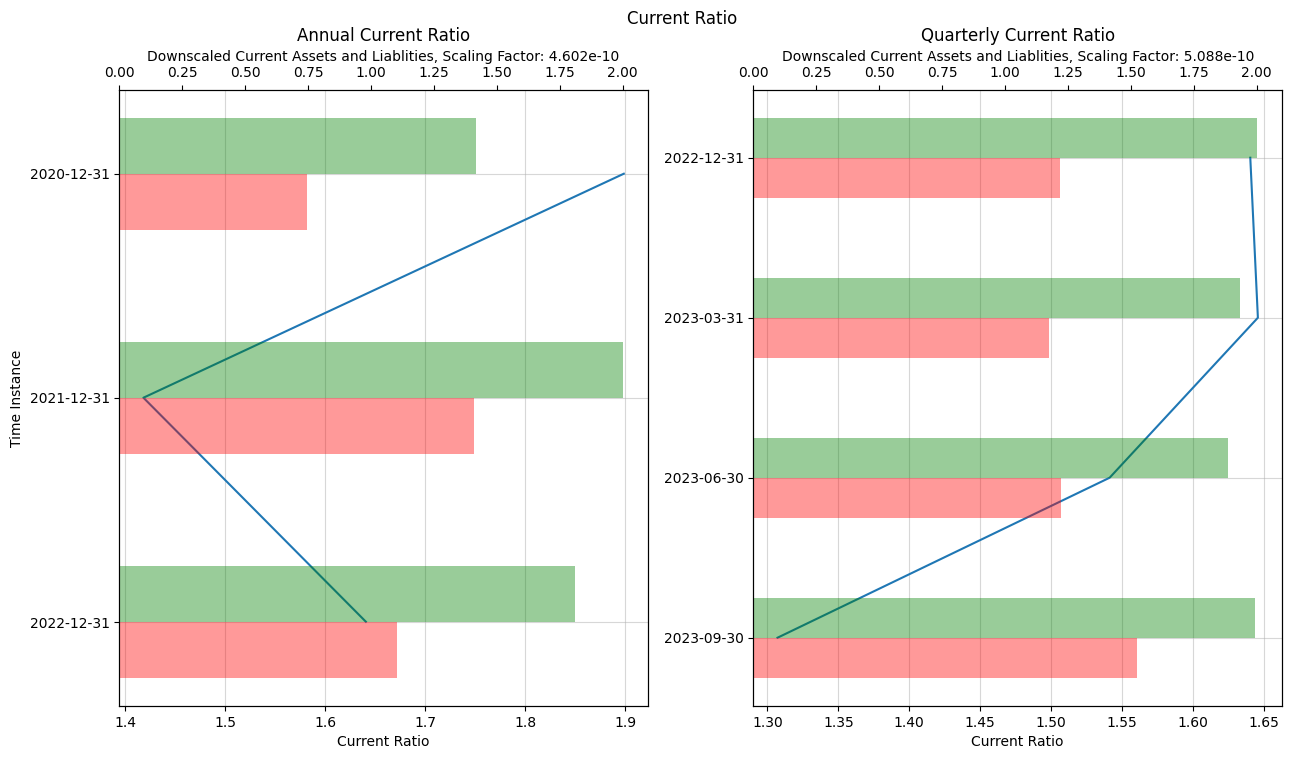

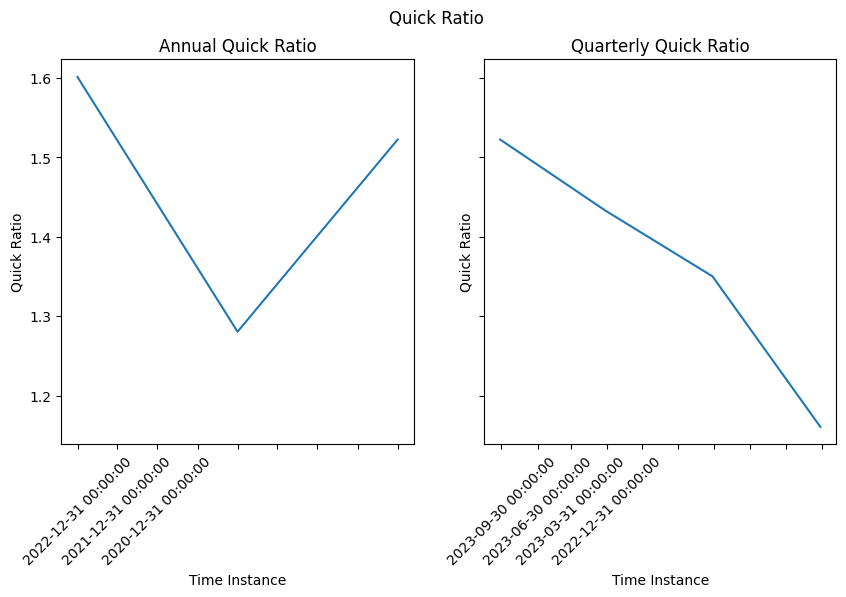

In [23]:
symbol = 'HES'
with open('Report.md','w') as file:
    file.write(getSymbolReport(symbol = symbol))
file.close()

## **Hess Corporation**<br>
longName: Hess Corporation<br>
website: https://www.hess.com<br>
sector: Energy<br>
industry: Oil & Gas E&P<br>

### **Business Summary**<br>
Hess Corporation, an exploration and production company, explores, develops, produces, purchases, transports, and sells crude oil, natural gas liquids (NGLs), and natural gas. The company operates in two segments, Exploration and Production, and Midstream. It conducts production operations primarily in the United States, Guyana, the Malaysia/Thailand Joint Development Area, and Malaysia; and exploration activities principally offshore Guyana, the U.S. Gulf of Mexico, and offshore Suriname and Canada. The company is also involved in gathering, compressing, and processing natural gas; fractionating NGLs; gathering, terminaling, loading, and transporting crude oil and NGL through rail car; and storing and terminaling propane, as well as providing water handling services primarily in the Bakken Shale plays in the Williston Basin area of North Dakota. The company was incorporated in 1920 and is headquartered in New York, New York.majorEmployees:<br>
- Mr. John B. Hess: CEO & Director<br>
- Mr. John P. Rielly: Executive VP & CFO<br>
- Mr. Gregory P. Hill: COO and President of Exploration & Production<br>
- Mr. Timothy B. Goodell: Executive VP, General Counsel, Corporate Secretary & Chief Compliance Officer<br>
- Ms. Barbara J. Lowery-Yilmaz: Senior VP & Chief Exploration Officer<br>
- Mr. Richard  Lynch: Senior Vice President of Technology & Services<br>
- Mr. Jay R. Wilson: Vice President of Investor Relations<br>
- Lorrie  Hecker: Vice President of Communications<br>
- Mr. Andrew P. Slentz: Senior Vice President of Human Resources & Office Management<br>
- Jonathan C. Stein: Senior VP, CFO of Midstream & Chief Risk Officer<br>
### **Recent Company News**<br>
title: Top 12 Oil and Gas Stocks To Invest In According To Hedge Funds<br>
link: https://finance.yahoo.com/news/top-12-oil-gas-stocks-093928090.html<br>
publisher: Insider Monkey<br>
<br>
title: TotalEnergies (TTE) Q4 Earnings and Revenues Miss Estimates<br>
link: https://finance.yahoo.com/news/totalenergies-tte-q4-earnings-revenues-183300065.html<br>
publisher: Zacks<br>
<br>
title: Hess Achieves CDP Climate Change Leadership Status<br>
link: https://finance.yahoo.com/news/hess-achieves-cdp-climate-change-145700720.html<br>
publisher: Business Wire<br>
<br>
title: Why oil majors are reluctant to move away from fossil fuels<br>
link: https://finance.yahoo.com/video/why-oil-majors-reluctant-move-172616919.html<br>
publisher: Yahoo Finance Video<br>
<br>
title: Energy companies' Q4 earnings expected to decline the most among sectors<br>
link: https://finance.yahoo.com/news/energy-companies-q4-earnings-expected-to-decline-the-most-among-sectors-163512874.html<br>
publisher: Yahoo Finance<br>
<br>
title: Hess Corp. Boosts Bakken Output, Drilling Ahead of Chevron Merger<br>
link: https://finance.yahoo.com/news/hess-corp-boosts-bakken-output-161609335.html<br>
publisher: Hart Energy<br>
<br>
title: Hess (HES) Q4 Earnings Surpass Estimates, Revenues Fall Y/Y<br>
link: https://finance.yahoo.com/news/hess-hes-q4-earnings-surpass-155000428.html<br>
publisher: Zacks<br>
<br>
title: Here's What Key Metrics Tell Us About Hess (HES) Q4 Earnings<br>
link: https://finance.yahoo.com/news/heres-key-metrics-tell-us-150003693.html<br>
publisher: Zacks<br>
<br>
### **Investor Data**<br>
![Institutional Holders and Percentage Holding](./ReportMedia/Institutional_Holders_and_Percentage_Holding.png)<br>
![Mutual_Fund_Holders_and_Percentage_Holding](./ReportMedia/Mutual_Fund_Holders_and_Percentage_Holding.png)<br>
### **Latest Financials**<br>
#### General Financials<br>
totalRevenue: 10295000064<br>
totalDebt: 9598000128<br>
totalCash: 1688000000<br>
enterpriseValue: 52269355008<br>
bookValuePerShare: 29.185<br>
marketCap: 44928077824<br>
#### Liquidity Ratios<br>
![Current Ratio](./ReportMedia/Current_Ratio.png)<br>
![Quick Ratio](./ReportMedia/Quick_Ratio.png)<br>
